<a href="https://colab.research.google.com/github/thalesgmendes/student-performance-analytics/blob/main/student_pipeline_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('student-por.csv', sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
df['failures'].value_counts()

,count
failures,
0,549
1,70
2,16
3,14


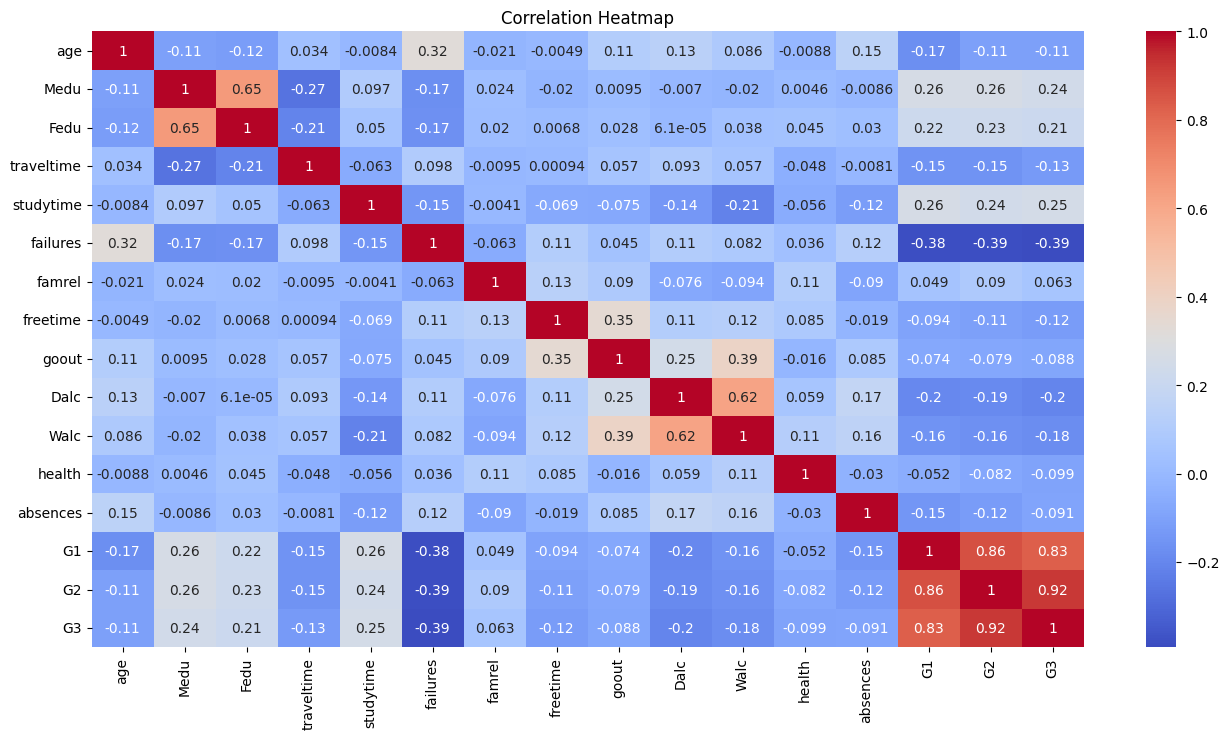

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

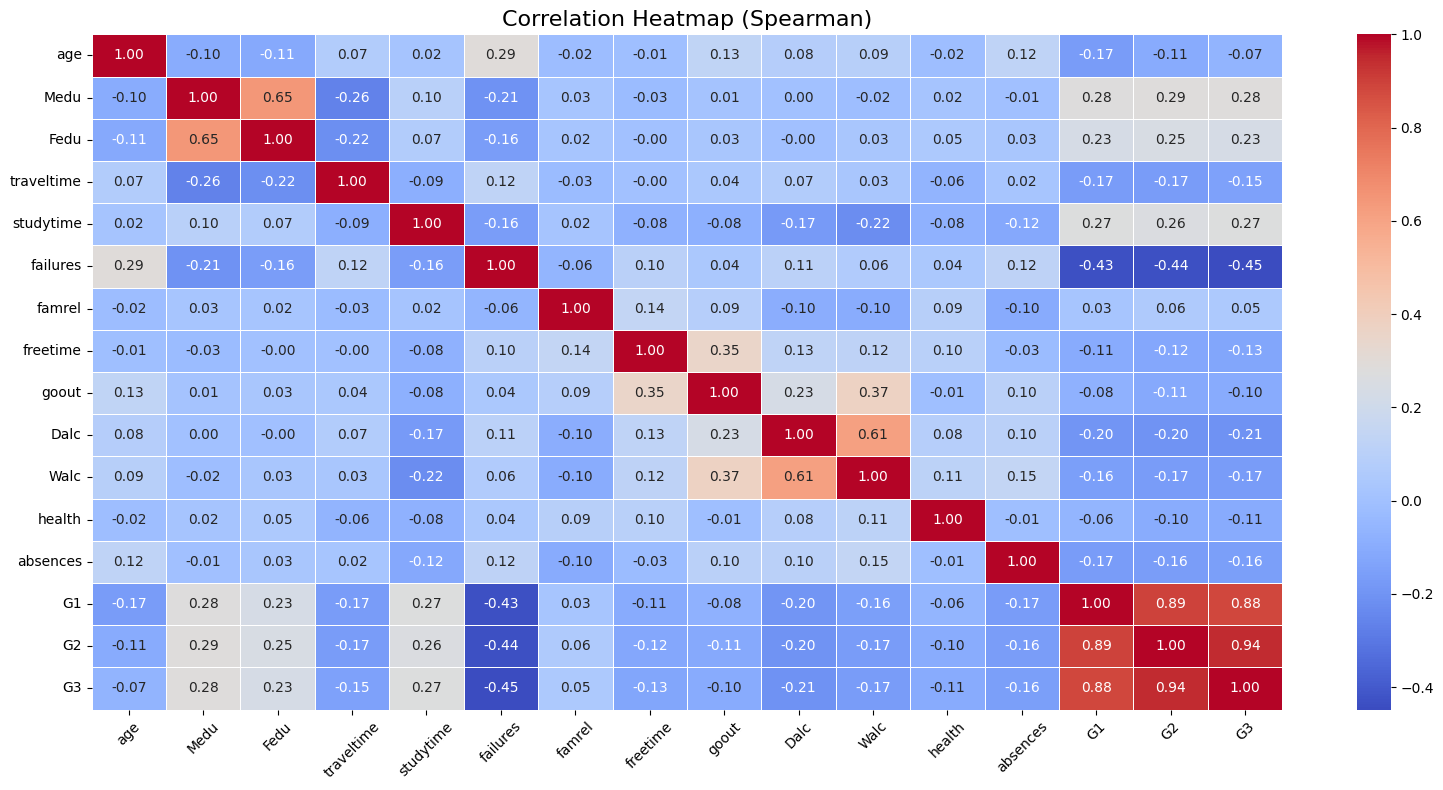

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calcula a correlação de Spearman
corr = numeric_df.corr(method='spearman')

# Plota o heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap (Spearman)", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Verificar G3 para escolas com gráfico de barras

verificar aspectos sociais

Verificar aspectos escolares

verificar quantidade de reprovações

verificar tempo de estudo



Verificar G3 para escolas com gráfico de barras

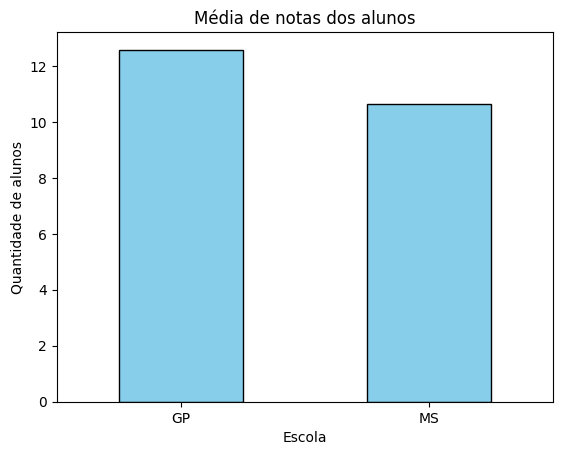

In [ ]:
internet = df.groupby('school')['G3'].mean()
# Plota gráfico de barras
internet.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Média de notas dos alunos')
plt.xlabel('Escola')
plt.ylabel('Quantidade de alunos')
plt.xticks(rotation=0)
plt.show()

Vericficar influência de aspectos sociais em G3

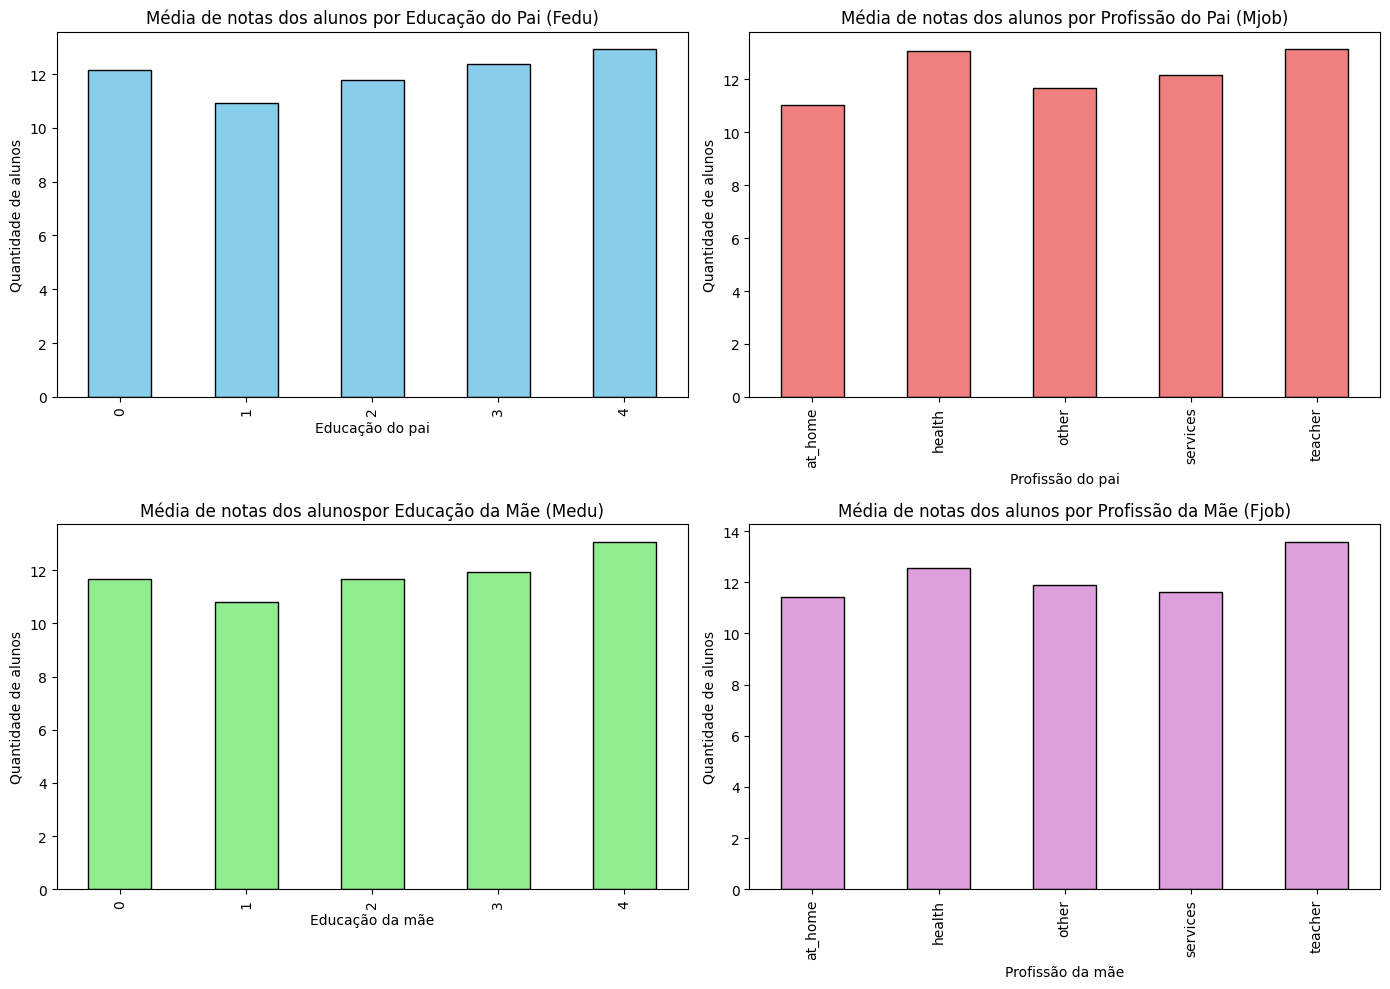

In [ ]:
educacao_mae = df.groupby('Medu')['G3'].mean()
educacao_pai = df.groupby('Fedu')['G3'].mean()
trabalho_pai = df.groupby('Mjob')['G3'].mean()
trabalho_mae = df.groupby('Fjob')['G3'].mean()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1 - Educação do pai
educacao_pai.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Média de notas dos alunos por Educação do Pai (Fedu)')
axes[0, 0].set_xlabel('Educação do pai')
axes[0, 0].set_ylabel('Quantidade de alunos')

# Gráfico 2 - Profissão do pai
trabalho_pai.plot(kind='bar', color='lightcoral', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('Média de notas dos alunos por Profissão do Pai (Mjob)')
axes[0, 1].set_xlabel('Profissão do pai')
axes[0, 1].set_ylabel('Quantidade de alunos')

# Gráfico 3 - Educação da mãe
educacao_mae.plot(kind='bar', color='lightgreen', edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Média de notas dos alunospor Educação da Mãe (Medu)')
axes[1, 0].set_xlabel('Educação da mãe')
axes[1, 0].set_ylabel('Quantidade de alunos')

# Gráfico 4 - Profissão da mãe
trabalho_mae.plot(kind='bar', color='plum', edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('Média de notas dos alunos por Profissão da Mãe (Fjob)')
axes[1, 1].set_xlabel('Profissão da mãe')
axes[1, 1].set_ylabel('Quantidade de alunos')

plt.tight_layout()
plt.show()

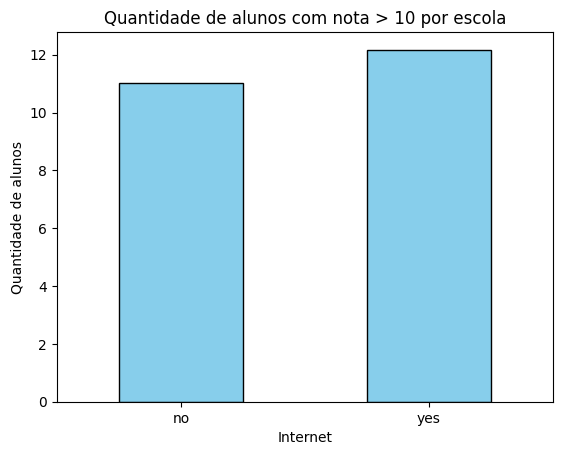

In [ ]:
internet = df.groupby('internet')['G3'].mean()
# Plota gráfico de barras
internet.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Média de notas dos alunos')
plt.xlabel('Internet')
plt.ylabel('Quantidade de alunos')
plt.xticks(rotation=0)
plt.show()

Vericficar influência do consumo de alcool em G3

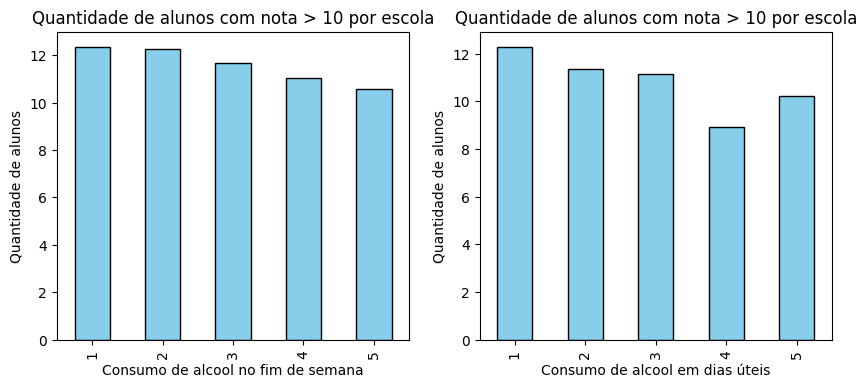

In [ ]:
alcool_fds = df.groupby('Walc')['G3'].mean()
alcool_du = df.groupby('Dalc')['G3'].mean()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plota gráfico de barras
alcool_fds.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Média de notas dos alunos')
axes[0].set_xlabel('Consumo de alcool no fim de semana')
axes[0].set_ylabel('Quantidade de alunos')

alcool_du.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_title('Média de notas dos alunos')
axes[1].set_xlabel('Consumo de alcool em dias úteis')
axes[1].set_ylabel('Quantidade de alunos')

plt.show()

Vericficar influência de reprovações e tempo de estudo em G3

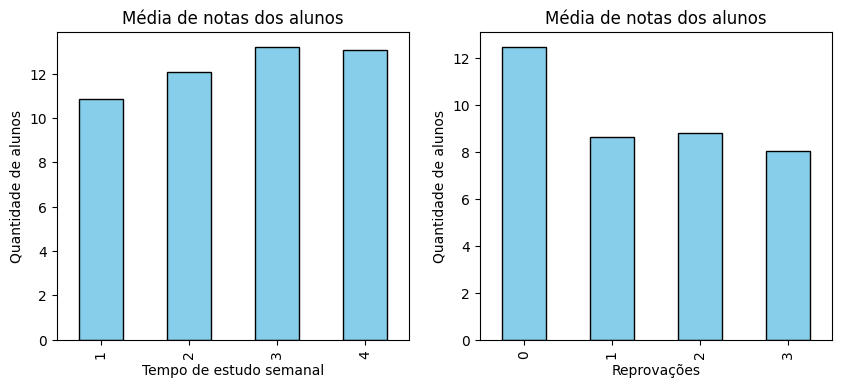

In [ ]:
estudo_tempo = df.groupby('studytime')['G3'].mean()
reprovavoes = df.groupby('failures')['G3'].mean()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plota gráfico de barras
estudo_tempo.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Média de notas dos alunos')
axes[0].set_xlabel('Tempo de estudo semanal')
axes[0].set_ylabel('Quantidade de alunos')

reprovavoes.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_title('Média de notas dos alunos')
axes[1].set_xlabel('Reprovações')
axes[1].set_ylabel('Quantidade de alunos')

plt.show()